In [21]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.windows import from_bounds
from rasterio.enums import Resampling
import matplotlib.pyplot as plt

In [2]:
from dotenv import load_dotenv
import os
from pathlib import Path

def load_environment():
    """Load environment variables and return them as a dictionary."""
    load_dotenv(Path("../utils/.env"))  # Loads .env from project root (works if run from notebook too)
    env_vars = {
        "IMAGE_FOLDER": os.getenv("IMAGE_FOLDER"),
        "EXTRACTEDDATASET_FOLDER": os.getenv("EXTRACTEDDATASET_FOLDER"),
        "DATASETS_FOLDER": os.getenv("DATASETS_FOLDER"),
        "ElevationDataset": os.getenv("ElevationDataset"),
        "LandCoverDataset": os.getenv("LandCoverDataset"),
        "GeoBoundaries": os.getenv("GeoBoundaries"),
        "EXTRACTEDELEVATION_FOLDER": os.getenv("EXTRACTEDELEVATION_FOLDER"),
        "EXTRACTEDLANDCOVER_FOLDER": os.getenv("EXTRACTEDLANDCOVER_FOLDER"),
        "EXTRACTEDGEOBOUNDARIES_FOLDER": os.getenv("EXTRACTEDGEOBOUNDARIES_FOLDER")
    }
    return env_vars

folders = load_environment()
image_folder = folders["IMAGE_FOLDER"]
extractedData_folder = folders["EXTRACTEDDATASET_FOLDER"]
datasets_folder = folders["DATASETS_FOLDER"]
landCover_folder = folders["LandCoverDataset"]
elevation_folder = folders["ElevationDataset"]
geoboundaries_folder = folders["GeoBoundaries"]
extracted_elevation_folder = folders["EXTRACTEDELEVATION_FOLDER"]
extracted_landcover_folder = folders["EXTRACTEDLANDCOVER_FOLDER"]
extracted_geo_boundaries_folder = folders["EXTRACTEDGEOBOUNDARIES_FOLDER"]

In [3]:
extractedData_folder

'../../ExtractedDatasets'

In [4]:
# Algeria land cover shapefile path
dz_path = f"{landCover_folder}/Algeria/dza_gc_adg.shp"

lc_dz = gpd.read_file(dz_path)
print(lc_dz.head())
print(lc_dz.crs)

lc_dz.to_file(f"{extracted_landcover_folder}/landcover_algeria.geojson", driver="GeoJSON")


   ID  GRIDCODE          AREA       LCCCODE  \
0   4       210  6.228187e+06  7001 // 8001   
1   2       210  6.242408e+06  7001 // 8001   
2   1       210  1.482995e+06  7001 // 8001   
3   8        50  4.590841e+08  21497-121340   
4  13       210  6.371533e+06  7001 // 8001   

                                            geometry  
0  POLYGON ((6.41528 37.08696, 6.43103 37.0855, 6...  
1  POLYGON ((7.18084 37.07917, 7.17998 37.08091, ...  
2  POLYGON ((7.37137 37.08194, 7.3709 37.08717, 7...  
3  POLYGON ((6.12361 36.68472, 6.12361 36.69306, ...  
4  POLYGON ((6.26181 37.02361, 6.26193 37.02514, ...  
EPSG:4326


<Figure size 1000x800 with 0 Axes>

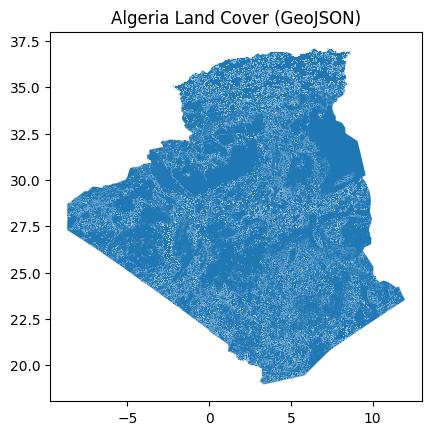

In [22]:
dz = gpd.read_file(f"{extracted_landcover_folder}/landcover_algeria.geojson")
plt.figure(figsize=(10, 8))
dz.plot()
plt.title("Algeria Land Cover (GeoJSON)")
plt.show()

In [ ]:
#  saving the image
# plt.savefig(f"{image_folder}/landcover_algeria_geojson.png")

<Figure size 640x480 with 0 Axes>

In [11]:
countries = gpd.read_file(f"{extracted_geo_boundaries_folder}/AOI_DZA_TUN/aoi_dza_tun.gpkg")

💡 What this does step by step
| Step           | Description                                                                             |
| -------------- | --------------------------------------------------------------------------------------- |
| **Simplify**   | Reduces the number of vertices in your AOI polygon, preventing huge memory allocations. |
| **Downsample** | Reduces raster resolution by a factor of `scale` (e.g. 4 = 16× smaller area in memory). |
| **Clip**       | Keeps only the pixels within your AOI (Tunisia + Algeria).                              |
| **Save**       | Writes the clipped, downsampled raster as a new `.tif` you can use for analysis.        |


In [ ]:
# # --- 1. Paths ---
# tn_path = f"{landCover_folder}/Tunisia/LCLU.LCTNS2022.tif"
# out_tif = f"{extracted_landcover_folder}/landcover_dz_tn_downsampled.tif"

# # --- 2. Simplify the geometry to reduce memory usage ---
# countries["geometry"] = countries["geometry"].simplify(0.01)

# # --- 3. Downsample the raster to reduce resolution ---
# scale = 4  # Increase to 8 for more reduction

# with rasterio.open(tn_path) as src:
#     # Compute new dimensions
#     new_height = src.height // scale
#     new_width = src.width // scale

#     # Resample (downsample)
#     out_image = src.read(
#         out_shape=(src.count, new_height, new_width),
#         resampling=Resampling.bilinear
#     )

#     # Adjust transform for new resolution
#     out_transform = src.transform * src.transform.scale(
#         src.width / new_width,
#         src.height / new_height
#     )

#     # Copy and update metadata
#     out_meta = src.meta.copy()
#     out_meta.update({
#         "driver": "GTiff",
#         "height": new_height,
#         "width": new_width,
#         "transform": out_transform
#     })

# # --- 4. Clip to AOI (Tunisia + Algeria) ---
# with rasterio.open(tn_path) as src:
#     countries = countries.to_crs(src.crs)  # Make sure CRS matches
#     geoms = countries.geometry.values

#     # Apply mask
#     out_image_clipped, out_transform_clipped = mask(
#         src, geoms, crop=True, all_touched=False
#     )

#     # Update metadata for clipped version
#     out_meta.update({
#         "height": out_image_clipped.shape[1],
#         "width": out_image_clipped.shape[2],
#         "transform": out_transform_clipped
#     })

# # --- 5. Save the result ---
# with rasterio.open(out_tif, "w", **out_meta) as dest:
#     dest.write(out_image_clipped)

# print(f"✅ Saved clipped and downsampled raster to: {out_tif}")


MemoryError: Unable to allocate 27.5 GiB for an array with shape (81279, 45373) and data type int64